In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame

tweet_data = pd.read_csv("vaksinsentimen.csv")
data = pd.DataFrame(tweet_data[['tweet_stemmed', 'label']])
data.head()

,tweet_stemmed,label
0,"['warga', 'ikut', 'giat', 'kerumun', 'jalan', ...",negatif
1,"['kemenag', 'usul', 'beli', 'vaksin', 'covid',...",positif
2,"['banding', 'vaksin', 'covid']",positif
3,"['indonesia', 'milik', 'infrastruktur', 'sdm',...",positif
4,"['rebut', 'vaksin', 'covid', 'fenomena', 'butu...",positif


In [2]:
data['label'].value_counts()

positif    5885
negatif    2954
Name: label, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

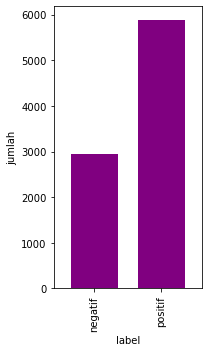

In [3]:
import matplotlib.pyplot as plt

_, ax1 = plt.subplots(figsize=(3,5))
stars_histogram = data['label'].value_counts().sort_index()
stars_histogram.plot(kind='bar', width=0.7, color='purple')
plt.xlabel('label')
plt.ylabel('jumlah')

plt.tight_layout()
plt.show

In [4]:
from nltk import FreqDist
import seaborn as sns

def freq_words(x, terms = 30):
    all_words = ' '.join([tweet for tweet in x])
    all_words = all_words.split()
    
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word': list(fdist.keys()), 'count':list(fdist.values())})
    
    d = words_df.nlargest(columns="count", n = terms)
    plt.figure(figsize=(25,7))
    ax = sns.barplot(data=d, x="word", y="count")
    ax.set(ylabel='count')
    plt.show()

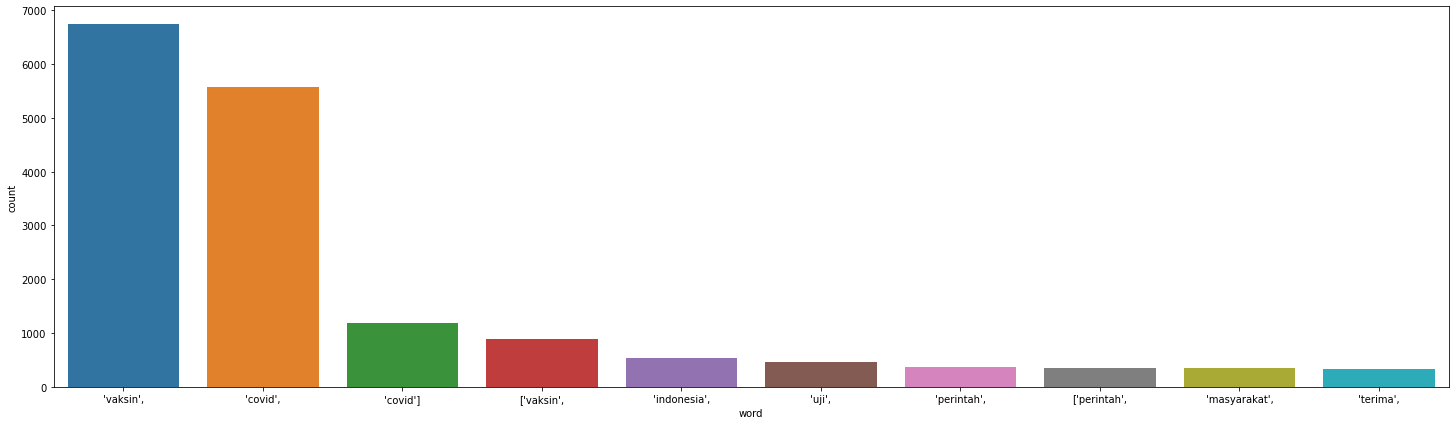

In [5]:
freq_words(data['tweet_stemmed'],10)

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features=2500)
tf = tf.fit_transform(data['tweet_stemmed'])

print(tf)

  (0, 2411)	0.07594425144781662
  (0, 2252)	0.4445124508762717
  (0, 892)	0.3356730648907026
  (0, 1055)	0.45056827755169476
  (0, 683)	0.4830251614358999
  (0, 789)	0.38402363020906516
  (0, 2447)	0.3164893636757104
  (1, 714)	0.4400517929980275
  (1, 1195)	0.3638690075865058
  (1, 1975)	0.3351142912929263
  (1, 348)	0.2665611604354944
  (1, 429)	0.0700963009336854
  (1, 247)	0.2851687928676514
  (1, 2399)	0.42778910351265553
  (1, 1035)	0.4658804962184164
  (1, 2411)	0.06568438661277434
  (2, 194)	0.9677908091697851
  (2, 429)	0.18370557006661442
  (2, 2411)	0.17214300221906437
  (3, 1767)	0.243536451120485
  (3, 560)	0.23933405177544606
  (3, 1023)	0.41371882704874385
  (3, 358)	0.2781064651096925
  (3, 1907)	0.34058675004868694
  (3, 1427)	0.422811930138061
  :	:
  (8835, 429)	0.07230597223152017
  (8835, 2411)	0.06775497952396721
  (8836, 415)	0.43941885525622465
  (8836, 2117)	0.6211434839877259
  (8836, 2135)	0.5267837752802047
  (8836, 2053)	0.3577956097297941
  (8836, 429)	0.0

In [7]:
tf = TfidfVectorizer()
tf

TfidfVectorizer()

In [8]:
from sklearn.model_selection import train_test_split
# X sebagai fitur dan y sebagai target
X = data['tweet_stemmed']
y = data['label']
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1) 

In [9]:
x_traintf=tf.fit_transform(X_train)

In [10]:
len(X_train)

7071

In [11]:
x_traintf

<7071x7871 sparse matrix of type '<class 'numpy.float64'>'
	with 59552 stored elements in Compressed Sparse Row format>

In [12]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_traintf, y_train) 

MultinomialNB()

In [13]:
x_testtf=tf.transform(X_test)

In [14]:
ypred = mnb.predict(x_testtf)

In [15]:
ypred

array(['positif', 'positif', 'positif', ..., 'negatif', 'positif',
       'negatif'], dtype='<U7')

In [16]:
len(y_test)

1768

In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

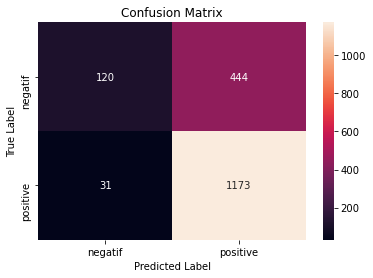

In [18]:
conf_mat = confusion_matrix(y_test, ypred)
class_label= ["negatif", "positive"]
test = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(test, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [19]:
#melakukan evaluasi dengan confussin metrics
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test, ypred))
print('accuracy score:')
print(accuracy_score(y_test, ypred))

[[ 120  444]
 [  31 1173]]
              precision    recall  f1-score   support

     negatif       0.79      0.21      0.34       564
     positif       0.73      0.97      0.83      1204

    accuracy                           0.73      1768
   macro avg       0.76      0.59      0.58      1768
weighted avg       0.75      0.73      0.67      1768

accuracy score:
0.7313348416289592
